In [1]:
import numpy as np
import tensorflow as tf

In [2]:
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
filename

Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv


'pima-indians-diabetes.csv'

In [4]:
df = pd.read_csv(filename, header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df.iloc[:, :-1])
label = df.iloc[:, -1]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, label, stratify=label, random_state=seed)
X_train.shape, X_test.shape

((576, 8), (192, 8))

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
model = Sequential([
                    Dense(12, input_dim=8, activation='relu'),
                    Dense(8, activation='relu'),
                    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)
modelpath = MODEL_DIR + 'best{epoch:03d}-{val_loss:.4f}.hdf5'

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=30)

In [14]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=500, batch_size=200, verbose=0, callbacks=[checkpointer, early_stopping])


Epoch 00001: val_loss improved from inf to 0.62752, saving model to ./model/best001-0.6275.hdf5

Epoch 00002: val_loss improved from 0.62752 to 0.62046, saving model to ./model/best002-0.6205.hdf5

Epoch 00003: val_loss improved from 0.62046 to 0.61398, saving model to ./model/best003-0.6140.hdf5

Epoch 00004: val_loss improved from 0.61398 to 0.60815, saving model to ./model/best004-0.6081.hdf5

Epoch 00005: val_loss improved from 0.60815 to 0.60259, saving model to ./model/best005-0.6026.hdf5

Epoch 00006: val_loss improved from 0.60259 to 0.59711, saving model to ./model/best006-0.5971.hdf5

Epoch 00007: val_loss improved from 0.59711 to 0.59190, saving model to ./model/best007-0.5919.hdf5

Epoch 00008: val_loss improved from 0.59190 to 0.58710, saving model to ./model/best008-0.5871.hdf5

Epoch 00009: val_loss improved from 0.58710 to 0.58265, saving model to ./model/best009-0.5827.hdf5

Epoch 00010: val_loss improved from 0.58265 to 0.57840, saving model to ./model/best010-0.5784

In [15]:
from tensorflow.keras.models import load_model
best_model = load_model('./model/best069-0.5269.hdf5')
acc = best_model.evaluate(X_test, y_test)
print(f'Accuracy: {acc[1]:.4f}')

6/6 [==============================] - 0s 2ms/step - loss: 0.4560 - accuracy: 0.7917
Accuracy: 0.7917


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

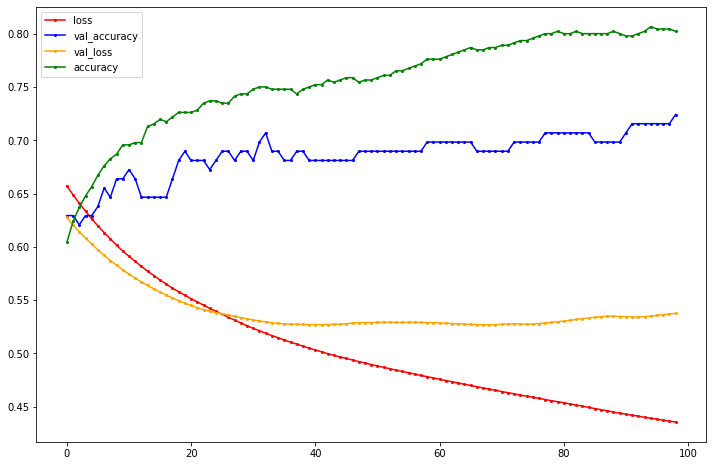

In [17]:
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
y_vacc = history.history['val_accuracy']
y_loss = history.history['loss']

x_len = np.arange(len(y_acc))
plt.figure(figsize=(12, 8))
plt.plot(x_len, y_loss, "-o", c='red', markersize=2, label='loss')
plt.plot(x_len, y_vacc, "-o", c='blue', markersize=2, label='val_accuracy')
plt.plot(x_len, y_vloss, "-o", c='orange', markersize=2, label='val_loss')
plt.plot(x_len, y_acc, "-o", c='green', markersize=2, label='accuracy')
plt.legend()
plt.show()